# Lezione 20 - K-Means Clustering

## Sezione 1 - Titolo e obiettivi

---

## Mappa della lezione

| Sezione | Contenuto | Tempo stimato |
|---------|-----------|---------------|
| 1 | Titolo, obiettivi, ruolo nel percorso | 5 min |
| 2 | Teoria profonda: geometria, distanza, convergenza | 25 min |
| 3 | Schema mentale: flowchart K-Means | 5 min |
| 4 | Demo: clustering step-by-step | 20 min |
| 5 | Esercizi risolti + errori comuni | 20 min |
| 6 | Conclusione operativa con bignami | 10 min |
| 7 | Checklist di fine lezione + glossario | 5 min |
| 8 | Changelog didattico | 2 min |

---

## Obiettivi della Lezione

Al termine di questa lezione sarai in grado di:

| # | Obiettivo | Verifica |
|---|-----------|----------|
| 1 | **Comprendere** la geometria del K-Means | Sai perché assume cluster sferici? |
| 2 | **Spiegare** il ruolo dei centroidi | Sai calcolare il centroide di 3 punti? |
| 3 | **Calcolare** la distanza euclidea | Sai perché lo scaling è obbligatorio? |
| 4 | **Riconoscere** le assunzioni e i limiti | Sai quando K-Means fallisce? |
| 5 | **Applicare** K-Means con sklearn | Conosci i parametri chiave? |

---

## L'algoritmo in una formula

K-Means minimizza la **Within-Cluster Sum of Squares (WCSS)**:

$$J = \sum_{k=1}^{K} \sum_{i \in C_k} \|\mathbf{x}_i - \mathbf{c}_k\|^2$$

Dove:
- $K$ = numero di cluster
- $C_k$ = insieme dei punti nel cluster $k$
- $\mathbf{c}_k$ = centroide del cluster $k$
- $\|\cdot\|$ = distanza euclidea

**Intuizione:** minimizza la "dispersione" interna a ogni cluster.

---

## L'algoritmo in 4 passi (ASCII visualization)

```
Passo 0: INIZIALIZZA K centroidi (random o k-means++)
         c1 *           c2 *           c3 *

Passo 1: ASSEGNA ogni punto al centroide più vicino
         .   .           .   .           .   .
           .              .                .
         ─────┐         ─────┐          ─────┐
         Cluster 1      Cluster 2       Cluster 3

Passo 2: RICALCOLA centroidi come media dei punti assegnati
         c1' = mean(punti in C1)
         c2' = mean(punti in C2)
         c3' = mean(punti in C3)

Passo 3: RIPETI passi 1-2 finché convergenza (centroidi stabili)
```

---

## Perché questa lezione è importante

K-Means è l'algoritmo di clustering più usato al mondo: è semplice, veloce e spesso efficace.
Questa semplicità nasconde **assunzioni forti** che, se ignorate, portano a risultati sbagliati:

| Assunzione | Conseguenza se violata |
|------------|------------------------|
| Cluster **sferici** | Forme allungate vengono spezzate |
| Cluster di **dimensioni simili** | Cluster piccoli vengono "mangiati" |
| **Nessun outlier** | Gli outlier spostano i centroidi |
| **Feature sulla stessa scala** | Una feature domina le altre |

---

## Ruolo nel percorso

| Lezione | Argomento | Focus |
|---------|-----------|-------|
| 19 | Introduzione Unsupervised | Paradigma generale |
| **20** | **K-Means Clustering** | **Algoritmo base (sei qui)** |
| 21 | Scelta del numero di cluster | Elbow, Silhouette |
| 22 | Clustering Gerarchico | Dendrogrammi |
| 23 | DBSCAN | Densità, forme arbitrarie |

---

## Prerequisiti

| Concetto | Dove lo trovi | Verifica |
|----------|---------------|----------|
| Unsupervised vs Supervised | Lezione 19 | Sai che non c'è target? |
| StandardScaler | Lezione 13 | Sai perché scalare prima di distanze? |
| Distanza euclidea | Lezione 19 | Sai calcolare √(Δx² + Δy²)? |

**Micro-checkpoint prerequisiti:**
```python
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
print("Prerequisiti OK!" if hasattr(KMeans(), 'inertia_') else "Rivedi sklearn")
```

## Sezione 2 - Teoria profonda
Richiamo dei concetti di K-Means: geometria, distanza, funzione obiettivo, assunzioni e inizializzazione.


---

# Parte 1 - Teoria Concettuale

---

## 1.1 Cos'e il clustering
Il clustering raggruppa osservazioni simili tra loro senza conoscere a priori quanti gruppi esistono o quali siano. Serve a scoprire struttura nei dati a partire dalle sole feature, senza target.


---

## 1.3 La distanza euclidea

K-Means usa la **distanza euclidea** per misurare quanto un punto e lontano da un centroide.

### Formula in 2 dimensioni

Per due punti $A = (x_1, y_1)$ e $B = (x_2, y_2)$:

$$d(A, B) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$$

E il teorema di Pitagora: la distanza in linea retta.

### Formula generale (n dimensioni)

Per due punti con $n$ feature:

$$d(A, B) = \sqrt{\sum_{i=1}^{n} (a_i - b_i)^2}$$

### Esempio numerico

Punto A: (2, 3, 1)  
Punto B: (5, 7, 2)

$$d(A, B) = \sqrt{(5-2)^2 + (7-3)^2 + (2-1)^2} = \sqrt{9 + 16 + 1} = \sqrt{26} \approx 5.1$$

---

### Perche la distanza euclidea e importante

K-Means assegna ogni punto al centroide **piu vicino** in termini di distanza euclidea.

Questo ha conseguenze importanti:
1. **Scale diverse = problemi**: se una feature ha range 0-100 e un'altra 0-100.000, la seconda domina.
2. **Forma sferica implicita**: la distanza euclidea definisce "sfere" attorno ai centroidi.
3. **Outlier problematici**: punti molto lontani distorcono i centroidi.


---

## 1.4 L'algoritmo K-Means passo per passo

L'algoritmo e iterativo e segue questi passi:

### Passo 0: Inizializzazione
Scegli K punti iniziali come centroidi (random o con metodo k-means++).

### Passo 1: Assegnazione
Per ogni punto, calcola la distanza da tutti i K centroidi.
Assegna il punto al centroide piu vicino.

### Passo 2: Aggiornamento
Ricalcola ogni centroide come la media dei punti assegnati a quel cluster.

### Passo 3: Convergenza
Se i centroidi non cambiano (o cambiano meno di una soglia), STOP.
Altrimenti, torna al Passo 1.

---

### Visualizzazione dell'algoritmo

```
Iterazione 0:           (centroidi iniziali random)
                         (punti da clusterizzare)

Iterazione 1:  Assegna ogni punto al centroide piu vicino
               Ricalcola i centroidi

Iterazione 2:  Riassegna, ricalcola...

...

Convergenza:   I centroidi non si muovono piu -> FINE
```

---

### La funzione obiettivo (Inertia)

K-Means minimizza l'**inertia** (o Within-Cluster Sum of Squares, WCSS):

$$\text{Inertia} = \sum_{k=1}^{K} \sum_{x_i \in C_k} ||x_i - \mu_k||^2$$

In parole: la somma delle distanze al quadrato di ogni punto dal suo centroide.

**Meno inertia = cluster piu compatti.**

Attenzione: l'inertia diminuisce SEMPRE all'aumentare di K (caso limite: K = n punti -> inertia = 0).


---

## 1.5 Le assunzioni forti di K-Means

K-Means funziona bene **solo se** i dati rispettano certe condizioni. Se queste assunzioni sono violate, i risultati saranno sbagliati.

---

### Assunzione 1: Cluster sferici (isotropici)

K-Means assume che i cluster abbiano **forma sferica** (o iper-sferica in n dimensioni).

Questo perche usa la distanza euclidea, che definisce "cerchi" di equidistanza attorno ai centroidi.

**Problema:** Se i cluster hanno forma allungata, a "banana" o irregolare, K-Means li taglia male.

---

### Assunzione 2: Cluster di dimensioni simili

K-Means tende ad assegnare lo stesso numero di punti a ogni cluster.

**Problema:** Se un cluster ha 1000 punti e un altro ne ha 50, K-Means potrebbe "rubare" punti dal cluster grande per bilanciare.

---

### Assunzione 3: Varianza simile tra cluster

K-Means assume che i cluster abbiano **dispersione simile** attorno al centroide.

**Problema:** Se un cluster e molto compatto e un altro molto disperso, il confine sara sbagliato.

---

### Assunzione 4: Assenza di outlier significativi

I centroidi sono **medie**, quindi molto sensibili agli outlier.

**Problema:** Un singolo punto anomalo puo spostare significativamente un centroide.

---

### Tabella riassuntiva

| Assunzione | Cosa assume K-Means | Cosa succede se violata |
|------------|---------------------|-------------------------|
| Forma | Cluster sferici | Cluster tagliati male |
| Dimensione | Cluster bilanciati | Punti assegnati al cluster sbagliato |
| Varianza | Dispersione simile | Confini distorti |
| Outlier | Nessun outlier | Centroidi distorti |


---

## 1.6 Il problema dell'inizializzazione

K-Means e un algoritmo **greedy**: trova un minimo locale, non globale.

Il risultato dipende da **dove partono i centroidi iniziali**.

### Il problema

```
Inizializzazione A:                Converge a soluzione X
Inizializzazione B:                Converge a soluzione Y (diversa!)
```

Con centroidi iniziali diversi, K-Means puo convergere a soluzioni diverse.

### La soluzione: k-means++

L'algoritmo **k-means++** (default in sklearn) sceglie i centroidi iniziali in modo intelligente:

1. Scegli il primo centroide random.
2. Per i successivi, scegli punti **lontani** dai centroidi gia scelti.
3. La probabilita di scegliere un punto e proporzionale alla sua distanza dal centroide piu vicino.

Questo riduce la probabilita di inizializzazioni sfortunate.

### n_init: eseguire piu volte

Sklearn esegue K-Means **n_init** volte con inizializzazioni diverse e tiene la soluzione con inertia minore.

```python
KMeans(n_clusters=3, n_init=10, random_state=42)
```

Significa: esegui 10 volte, tieni il risultato migliore.


---

# Parte 2 - Schema Mentale e Mappa Logica

---

## 2.1 Quando usare K-Means

### Situazioni ideali per K-Means

| Condizione | Perche K-Means funziona |
|------------|-------------------------|
| **Cluster sferici** | La distanza euclidea li cattura bene |
| **Cluster bilanciati** | Nessun cluster viene "schiacciato" |
| **Varianza simile** | I confini saranno corretti |
| **Dati scalati** | Tutte le feature contribuiscono equamente |
| **K noto o stimabile** | Puoi usare Elbow/Silhouette (Lezione 21) |
| **Molti dati** | K-Means e veloce anche su milioni di punti |

### Segnali che K-Means e appropriato

- Scatter plot 2D mostra gruppi "rotondi" e separati.
- Le feature hanno scale simili (o le hai scalate).
- Non ci sono outlier evidenti.
- Il business suggerisce un numero ragionevole di segmenti.

---

## 2.2 Quando NON usare K-Means

### Situazioni problematiche

| Condizione | Perche K-Means fallisce | Alternativa |
|------------|-------------------------|-------------|
| **Cluster allungati** | Li taglia male | DBSCAN, Spectral |
| **Cluster di dimensioni diverse** | Ruba punti | DBSCAN, GMM |
| **Outlier** | Distorcono i centroidi | DBSCAN, rimuovi outlier |
| **K ignoto** | Risultato arbitrario | Hierarchical per esplorare |
| **Forma arbitraria** | Assume sfericita | DBSCAN |

### Segnali che K-Means e inappropriato

- Scatter plot mostra forme "a banana" o irregolari.
- Un gruppo e molto piu grande degli altri.
- Ci sono punti isolati lontani da tutto.
- Non hai idea di quanti cluster cercare.

---

## 2.3 Checklist pre-K-Means

Prima di applicare K-Means:

- [ ] **Scaling**: hai applicato StandardScaler.
- [ ] **Outlier**: hai verificato e gestito i punti anomali.
- [ ] **K**: hai un'ipotesi su quanti cluster cercare.
- [ ] **Forma**: i dati sembrano avere gruppi "rotondi".
- [ ] **n_init**: stai usando n_init >= 10.
- [ ] **random_state**: hai fissato il seed per riproducibilita.


## Sezione 3 - Schema mentale e decision map
Quando usare K-Means, quando evitarlo e la checklist pre-applicazione.


---

# Parte 3 - Notebook Dimostrativo

---

## Demo 1: K-Means base per vedere l'algoritmo in azione

Generiamo dati con 3 gruppi ben separati e vediamo come K-Means li trova.


## Sezione 4 - Notebook dimostrativo
Demo progressive per vedere K-Means, le iterazioni, i limiti e l'effetto degli outlier.


### Perche questo passo (Demo 1)
Scenario ideale per leggere inertia, silhouette e centroidi su dati sferici scalati.


[Checkpoint] Dataset generato con shape (300, 2)
Etichette uniche: [0 1 2]
Punti per cluster: [100 100 100]
Inertia: 11.88 | Iterazioni: 2 | Silhouette: 0.878


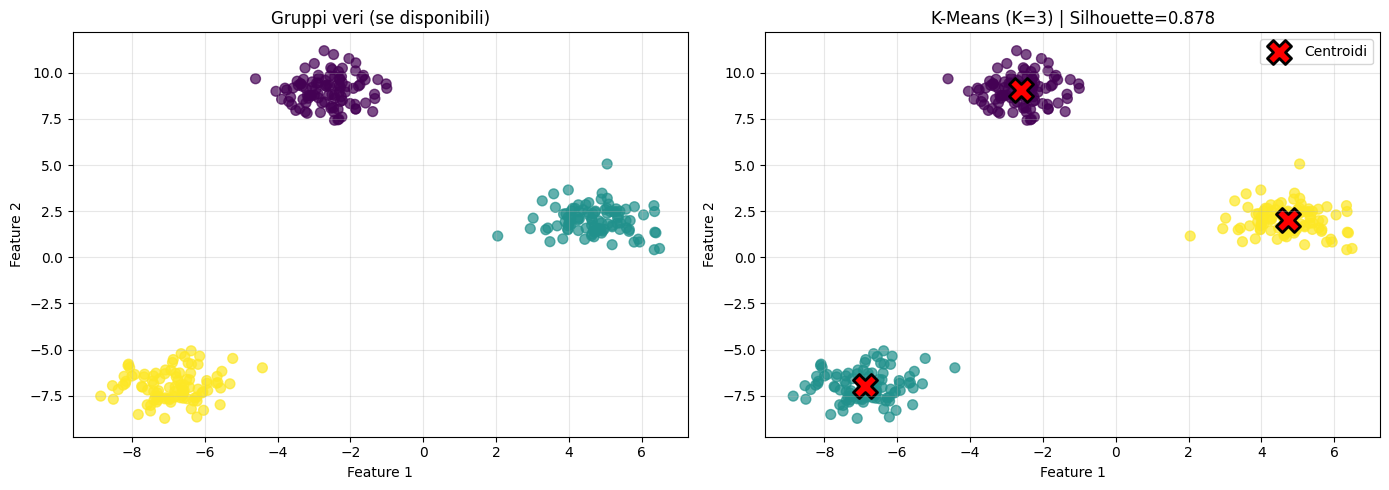

In [16]:
# ============================================
# DEMO 1: K-Means base
# Intento: vedere K-Means in azione su dati ideali
# Assunzioni: 3 cluster sferici, nessun valore mancante
# Output: etichette, inertia, silhouette, grafici
# ============================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.8, random_state=42)
assert X.shape == (300, 2) and y_true.shape == (300,), 'Shape inattesa'
assert not np.isnan(X).any(), 'Sono presenti NaN nei dati'
print('[Checkpoint] Dataset generato con shape', X.shape)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
assert X_scaled.shape == X.shape, 'Scaling ha alterato la shape'

kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=42)
labels = kmeans.fit_predict(X_scaled)

sil = silhouette_score(X_scaled, labels)
assert -1 <= sil <= 1, 'Silhouette fuori range'
print('Etichette uniche:', np.unique(labels))
print('Punti per cluster:', np.bincount(labels))
print(f'Inertia: {kmeans.inertia_:.2f} | Iterazioni: {kmeans.n_iter_} | Silhouette: {sil:.3f}')

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.7)
axes[0].set_title('Gruppi veri (se disponibili)')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].grid(True, alpha=0.3)

centroidi_originali = scaler.inverse_transform(kmeans.cluster_centers_)
axes[1].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
axes[1].scatter(centroidi_originali[:, 0], centroidi_originali[:, 1], c='red', marker='X', s=300, edgecolors='black', linewidth=2, label='Centroidi')
axes[1].set_title(f'K-Means (K=3) | Silhouette={sil:.3f}')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Perche questo passo (Demo 2)
Visualizza il movimento dei centroidi e perche inizializzazione e n_init contano.


[Checkpoint] Iterazioni registrate: 5


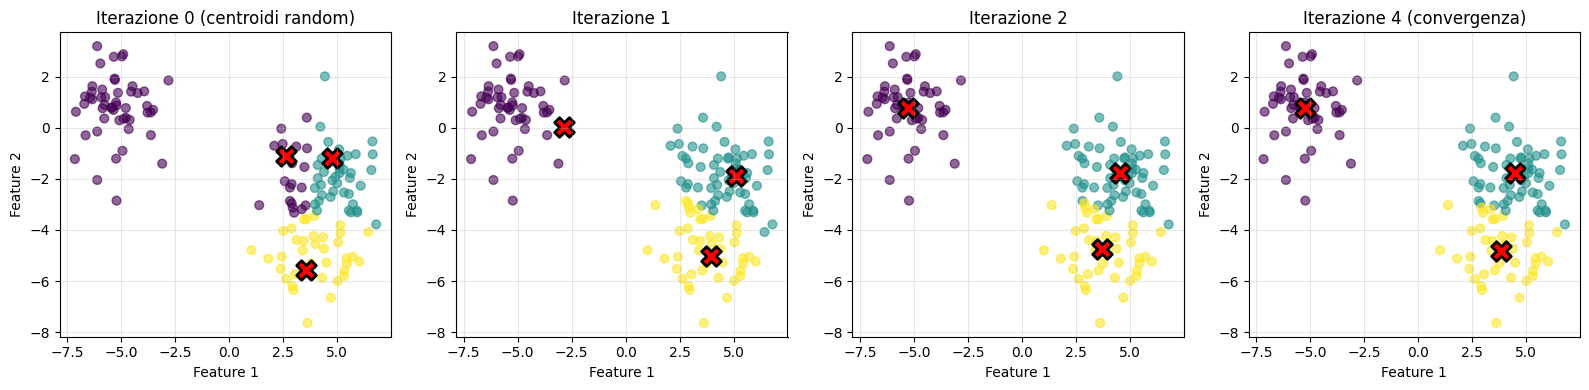

Spostamento dei centroidi (dal punto di partenza):
  Centroide 0: da (2.63,-1.10) a (-5.26,0.79) | spostamento 8.11
  Centroide 1: da (4.74,-1.20) a (4.47,-1.78) | spostamento 0.64
  Centroide 2: da (3.55,-5.58) a (3.83,-4.84) | spostamento 0.80


In [17]:
# ============================================
# DEMO 2: Visualizzare le iterazioni di K-Means
# Intento: mostrare il movimento dei centroidi passo-passo
# Assunzioni: 3 cluster sferici, nessun NaN
# Output: grafici per iterazione e spostamento dei centroidi
# ============================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
np.random.seed(123)

X_demo, _ = make_blobs(n_samples=150, centers=3, cluster_std=1.2, random_state=123)
assert X_demo.shape[1] == 2, 'Attesa 2 feature per visualizzare'

np.random.seed(999)
initial_centroids = X_demo[np.random.choice(len(X_demo), 3, replace=False)]


def kmeans_step_by_step(X, K, initial_centroids, max_iter=10):
    centroids = initial_centroids.copy()
    history = [centroids.copy()]
    for iteration in range(max_iter):
        distances = np.zeros((len(X), K))
        for k in range(K):
            distances[:, k] = np.sqrt(np.sum((X - centroids[k])**2, axis=1))
        labels = np.argmin(distances, axis=1)
        new_centroids = np.zeros_like(centroids)
        for k in range(K):
            if np.sum(labels == k) > 0:
                new_centroids[k] = X[labels == k].mean(axis=0)
            else:
                new_centroids[k] = centroids[k]
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
        history.append(centroids.copy())
    return labels, centroids, history

labels_final, centroids_final, history = kmeans_step_by_step(X_demo, 3, initial_centroids)
print('[Checkpoint] Iterazioni registrate:', len(history))

n_plots = min(4, len(history))
fig, axes = plt.subplots(1, n_plots, figsize=(4*n_plots, 4))
iterations_to_show = [0, 1, len(history)//2, len(history)-1][:n_plots]

for ax, iter_num in zip(axes, iterations_to_show):
    centroids_iter = history[iter_num]
    distances = np.zeros((len(X_demo), 3))
    for k in range(3):
        distances[:, k] = np.sqrt(np.sum((X_demo - centroids_iter[k])**2, axis=1))
    labels_iter = np.argmin(distances, axis=1)
    ax.scatter(X_demo[:, 0], X_demo[:, 1], c=labels_iter, cmap='viridis', s=40, alpha=0.6)
    ax.scatter(centroids_iter[:, 0], centroids_iter[:, 1], c='red', marker='X', s=200, edgecolors='black', linewidth=2)
    title = 'Iterazione ' + str(iter_num)
    if iter_num == 0:
        title += ' (centroidi random)'
    if iter_num == len(history)-1:
        title += ' (convergenza)'
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print('Spostamento dei centroidi (dal punto di partenza):')
for i in range(3):
    start = initial_centroids[i]
    end = centroids_final[i]
    dist = np.sqrt(np.sum((end - start)**2))
    print(f'  Centroide {i}: da ({start[0]:.2f},{start[1]:.2f}) a ({end[0]:.2f},{end[1]:.2f}) | spostamento {dist:.2f}')


### Perche questo passo (Demo 3)
Mostra i fallimenti geometrici di K-Means su forme non convesse o varianze diverse.


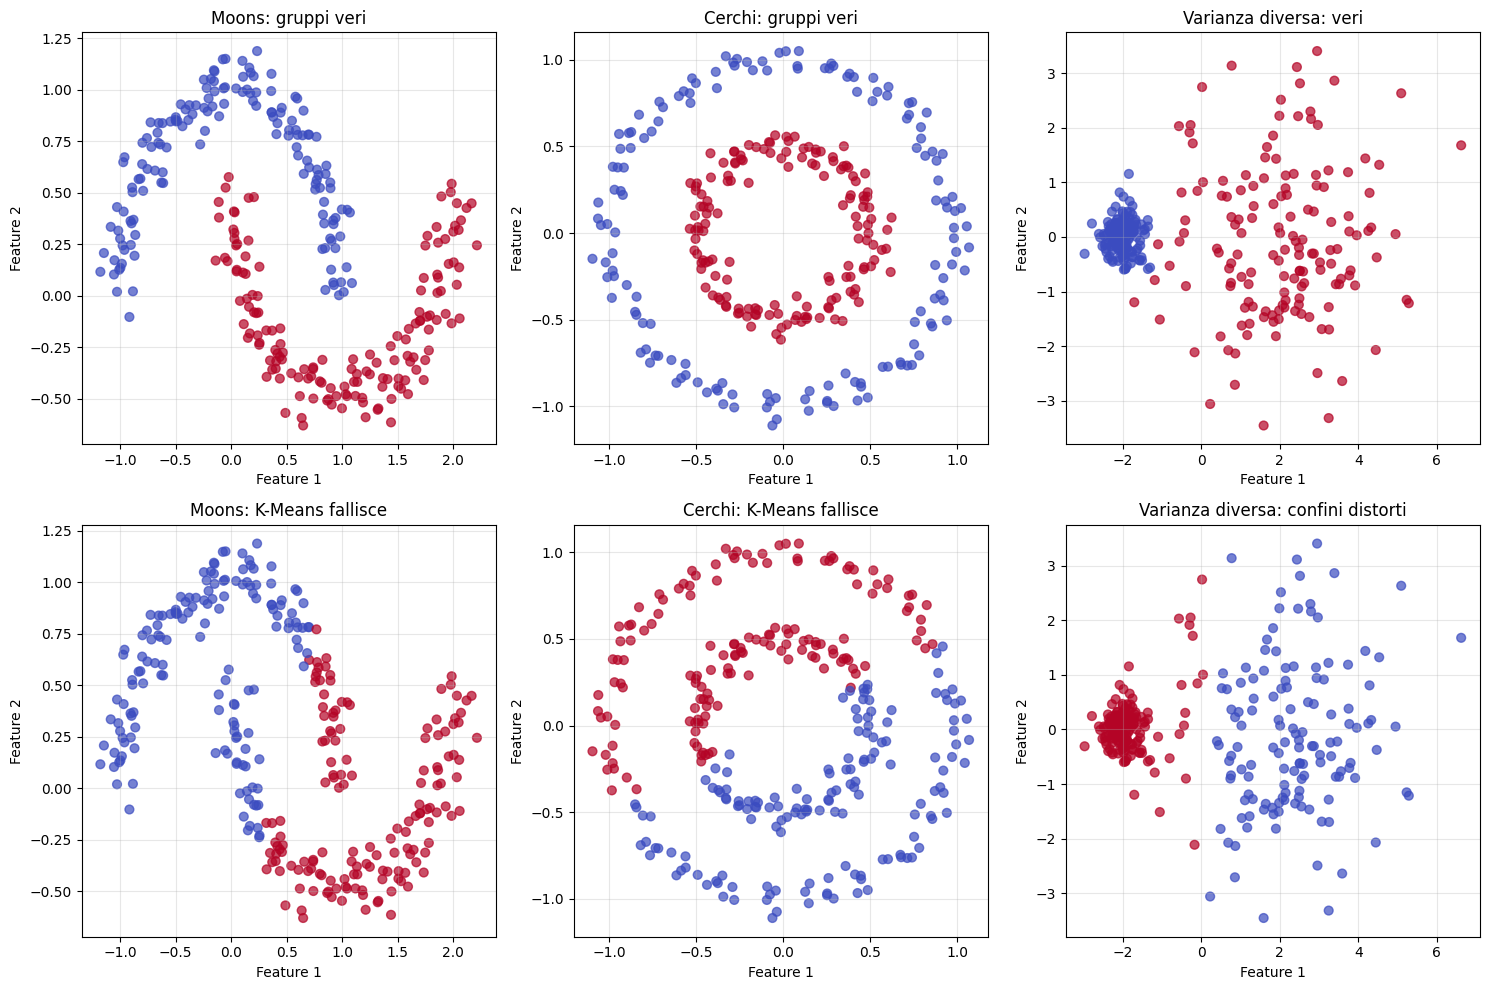

In [18]:
# ============================================
# DEMO 3: Quando K-Means fallisce
# Intento: mostrare i limiti con forme non sferiche
# Assunzioni: dataset moons/circles/varianza diversa
# Output: grafici che evidenziano assegnazioni errate
# ============================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons, make_circles, make_blobs

np.random.seed(42)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

X_moons, y_moons = make_moons(n_samples=300, noise=0.08, random_state=42)
labels_moons = KMeans(n_clusters=2, random_state=42, n_init=10).fit_predict(X_moons)
axes[0,0].scatter(X_moons[:,0], X_moons[:,1], c=y_moons, cmap='coolwarm', s=40, alpha=0.7)
axes[0,0].set_title('Moons: gruppi veri')
axes[1,0].scatter(X_moons[:,0], X_moons[:,1], c=labels_moons, cmap='coolwarm', s=40, alpha=0.7)
axes[1,0].set_title('Moons: K-Means fallisce')

X_circles, y_circles = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)
labels_circles = KMeans(n_clusters=2, random_state=42, n_init=10).fit_predict(X_circles)
axes[0,1].scatter(X_circles[:,0], X_circles[:,1], c=y_circles, cmap='coolwarm', s=40, alpha=0.7)
axes[0,1].set_title('Cerchi: gruppi veri')
axes[1,1].scatter(X_circles[:,0], X_circles[:,1], c=labels_circles, cmap='coolwarm', s=40, alpha=0.7)
axes[1,1].set_title('Cerchi: K-Means fallisce')

X_var, y_var = make_blobs(n_samples=300, centers=[[-2,0],[2,0]], cluster_std=[0.3,1.5], random_state=42)
labels_var = KMeans(n_clusters=2, random_state=42, n_init=10).fit_predict(X_var)
axes[0,2].scatter(X_var[:,0], X_var[:,1], c=y_var, cmap='coolwarm', s=40, alpha=0.7)
axes[0,2].set_title('Varianza diversa: veri')
axes[1,2].scatter(X_var[:,0], X_var[:,1], c=labels_var, cmap='coolwarm', s=40, alpha=0.7)
axes[1,2].set_title('Varianza diversa: confini distorti')

for ax in axes.flat:
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Perche questo passo (Demo 4)
Evidenzia l'impatto degli outlier e introduce strategie robuste (cleaning o modelli alternativi).


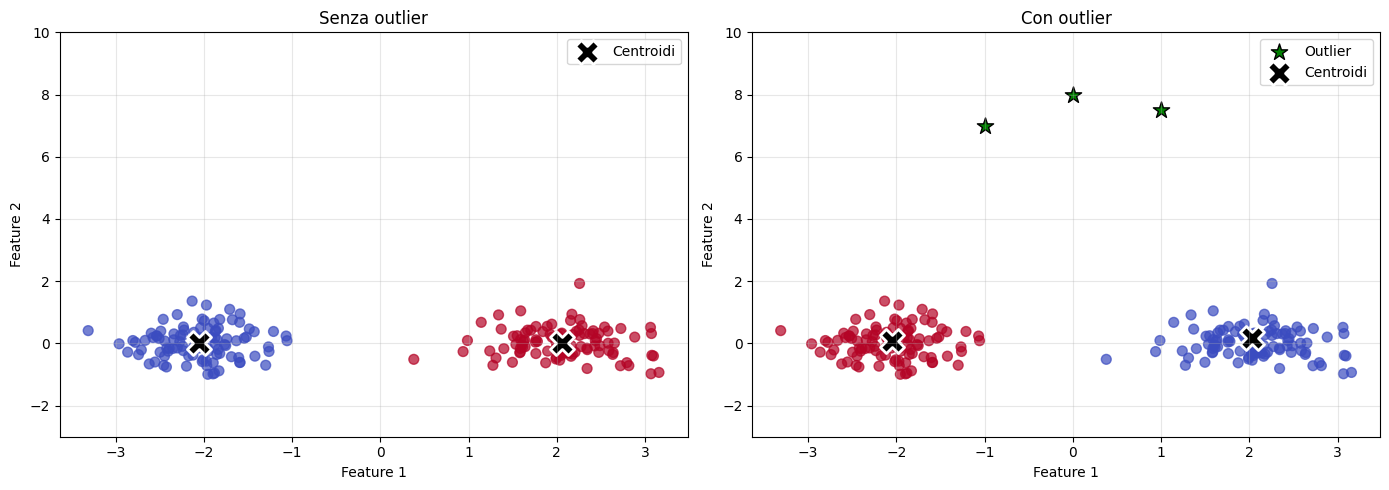

Spostamento centroidi (norma L2):
  Cluster 0: shift = 4.09
  Cluster 1: shift = 4.11
Nota: pochi outlier possono distorcere i centroidi e le assegnazioni.


In [19]:
# ============================================
# DEMO 4: Effetto degli outlier
# Intento: mostrare come pochi outlier spostano i centroidi
# Assunzioni: 2 cluster sferici + 3 outlier lontani
# Output: grafici comparativi e spostamento centroidi
# ============================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

np.random.seed(42)
X_clean = np.vstack([
    np.random.randn(100, 2) * 0.5 + np.array([-2, 0]),
    np.random.randn(100, 2) * 0.5 + np.array([2, 0])
])
assert X_clean.shape == (200, 2)

outliers = np.array([[0, 8], [-1, 7], [1, 7.5]])
X_with_outliers = np.vstack([X_clean, outliers])
assert X_with_outliers.shape == (203, 2)

kmeans_clean = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_clean = kmeans_clean.fit_predict(X_clean)

kmeans_outliers = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_outliers = kmeans_outliers.fit_predict(X_with_outliers)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].scatter(X_clean[:, 0], X_clean[:, 1], c=labels_clean, cmap='coolwarm', s=50, alpha=0.7)
axes[0].scatter(kmeans_clean.cluster_centers_[:, 0], kmeans_clean.cluster_centers_[:, 1], c='black', marker='X', s=300, edgecolors='white', linewidth=2, label='Centroidi')
axes[0].set_title('Senza outlier')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim(-3, 10)

axes[1].scatter(X_clean[:, 0], X_clean[:, 1], c=labels_outliers[:200], cmap='coolwarm', s=50, alpha=0.7)
axes[1].scatter(outliers[:, 0], outliers[:, 1], c='green', s=150, marker='*', edgecolors='black', linewidth=1, label='Outlier')
axes[1].scatter(kmeans_outliers.cluster_centers_[:, 0], kmeans_outliers.cluster_centers_[:, 1], c='black', marker='X', s=300, edgecolors='white', linewidth=2, label='Centroidi')
axes[1].set_title('Con outlier')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim(-3, 10)

plt.tight_layout()
plt.show()

print('Spostamento centroidi (norma L2):')
for i in range(2):
    shift = np.sqrt(np.sum((kmeans_clean.cluster_centers_[i] - kmeans_outliers.cluster_centers_[i])**2))
    print(f'  Cluster {i}: shift = {shift:.2f}')
print('Nota: pochi outlier possono distorcere i centroidi e le assegnazioni.')


## Sezione 5 - Esercizi guidati (step by step)
Esegui in ordine 20.1 -> 20.3 con razionale, assunzioni e output attesi.


### Perche questo esercizio (20.1)
Consolidare calcoli manuali di centroide, distanza euclidea e inertia prima di usare sklearn.


---

# Parte 4  Esercizi Svolti

---

## Esercizio 20.1  Calcolo manuale della distanza euclidea e del centroide

**Consegna:**
Dati i seguenti punti in 2D appartenenti a un cluster:
- A = (1, 2)
- B = (3, 4)
- C = (2, 1)
- D = (4, 3)

1. Calcola il centroide del cluster
2. Calcola la distanza euclidea di ogni punto dal centroide
3. Calcola l'inertia (somma delle distanze al quadrato)

Centroide: [2.5 2.5]
Distanze euclidee dal centroide:
  A: 1.581
  B: 1.581
  C: 1.581
  D: 1.581
Inertia (WCSS): 10.000


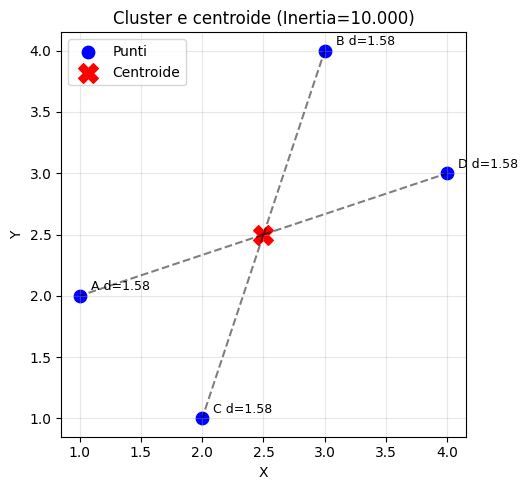

In [20]:
# ============================================
# ESERCIZIO 20.1 - SOLUZIONE GUIDATA
# Intento: calcolare centroide, distanze e inertia a mano
# ============================================

import numpy as np
import matplotlib.pyplot as plt

punti = np.array([[1, 2], [3, 4], [2, 1], [4, 3]])
nomi = ['A', 'B', 'C', 'D']
assert punti.shape == (4, 2), 'Attesi 4 punti 2D'

centroide = punti.mean(axis=0)
print('Centroide:', centroide)

print('Distanze euclidee dal centroide:')
distanze = []
for nome, p in zip(nomi, punti):
    d = np.linalg.norm(p - centroide)
    distanze.append(d)
    print(f'  {nome}: {d:.3f}')

inertia = np.sum((punti - centroide)**2)
print(f'Inertia (WCSS): {inertia:.3f}')

fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(punti[:,0], punti[:,1], c='blue', s=80, label='Punti')
ax.scatter(centroide[0], centroide[1], c='red', marker='X', s=200, label='Centroide')
for nome, p, d in zip(nomi, punti, distanze):
    ax.plot([centroide[0], p[0]], [centroide[1], p[1]], 'k--', alpha=0.5)
    ax.annotate(f'{nome} d={d:.2f}', (p[0], p[1]), textcoords='offset points', xytext=(8,4), fontsize=9)
ax.set_title(f'Cluster e centroide (Inertia={inertia:.3f})')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')
ax.legend()
plt.tight_layout()
plt.show()


### Perche questo esercizio (20.2)
Applicare K-Means a un dataset RFM sintetico con scaling, silhouette e lettura business dei cluster.


---

## Esercizio 20.2  Clustering di clienti e-commerce

**Consegna:**
Un e-commerce ha i seguenti dati sui clienti:
- `frequenza`: numero di acquisti negli ultimi 12 mesi
- `spesa_media`: valore medio per acquisto ()
- `recency`: giorni dall'ultimo acquisto

Applica K-Means per segmentare i clienti in 3 gruppi. Interpreta i cluster trovati.

[Checkpoint] Dataset clienti pronto (300, 3)
Punti per cluster: [ 98  80 122]
Inertia: 161.66 | Silhouette: 0.611
Statistiche per cluster:         frequenza      spesa_media       recency      
             mean  std        mean   std    mean   std
cluster                                               
0            12.3  4.1        80.0  24.5   160.2  37.0
1            24.4  4.8       149.7  27.5    10.7   5.1
2             5.0  1.7        51.4  16.1    44.1  16.0
Interpretazione cluster (descrittiva):
- Cluster 0: Clienti dormienti (erano attivi, ora assenti) | Azione: Campagne win-back e sconti di rientro
- Cluster 1: Clienti premium (frequenti, alta spesa, molto attivi) | Azione: Programma loyalty, anteprime, offerte esclusive
- Cluster 2: Clienti occasionali (acquisti sporadici) | Azione: Stimolare frequenza: cross-sell, newsletter


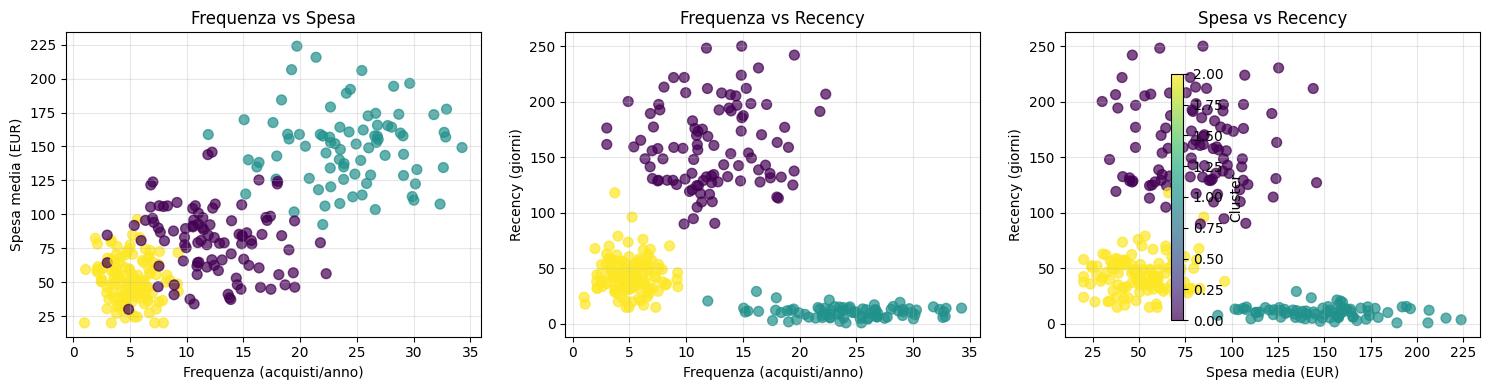

In [21]:
# ============================================
# ESERCIZIO 20.2 - SOLUZIONE
# Intento: segmentare clienti e-commerce con K-Means (K=3)
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

np.random.seed(42)

premium = pd.DataFrame({
    'frequenza': np.random.normal(25, 5, 80).clip(10, 40),
    'spesa_media': np.random.normal(150, 30, 80).clip(80, 250),
    'recency': np.random.normal(10, 5, 80).clip(1, 30)
})

tocasual = pd.DataFrame({
    'frequenza': np.random.normal(5, 2, 120).clip(1, 12),
    'spesa_media': np.random.normal(50, 15, 120).clip(20, 100),
    'recency': np.random.normal(45, 15, 120).clip(15, 90)
})

dormienti = pd.DataFrame({
    'frequenza': np.random.normal(12, 4, 100).clip(3, 25),
    'spesa_media': np.random.normal(80, 25, 100).clip(30, 150),
    'recency': np.random.normal(150, 40, 100).clip(90, 250)
})

df_clienti = pd.concat([premium, tocasual, dormienti], ignore_index=True)
assert df_clienti.shape == (300, 3), 'Shape inattesa per df_clienti'
assert not df_clienti.isna().any().any(), 'NaN nel dataset sintetico'
print('[Checkpoint] Dataset clienti pronto', df_clienti.shape)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clienti)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

sil = silhouette_score(X_scaled, labels)
assert -1 <= sil <= 1, 'Silhouette fuori range'
print('Punti per cluster:', np.bincount(labels))
print(f'Inertia: {kmeans.inertia_:.2f} | Silhouette: {sil:.3f}')

df_clienti['cluster'] = labels
cluster_stats = df_clienti.groupby('cluster').agg({'frequenza':['mean','std'], 'spesa_media':['mean','std'], 'recency':['mean','std']}).round(1)
print('Statistiche per cluster:', cluster_stats)

print('Interpretazione cluster (descrittiva):')
for cid in sorted(df_clienti['cluster'].unique()):
    subset = df_clienti[df_clienti['cluster']==cid]
    freq = subset['frequenza'].mean()
    spesa = subset['spesa_media'].mean()
    rec = subset['recency'].mean()
    if freq > 20 and rec < 40:
        profilo = 'Clienti premium (frequenti, alta spesa, molto attivi)'
        azione = 'Programma loyalty, anteprime, offerte esclusive'
    elif rec > 100:
        profilo = 'Clienti dormienti (erano attivi, ora assenti)'
        azione = 'Campagne win-back e sconti di rientro'
    else:
        profilo = 'Clienti occasionali (acquisti sporadici)'
        azione = 'Stimolare frequenza: cross-sell, newsletter'
    print(f"- Cluster {cid}: {profilo} | Azione: {azione}")

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].scatter(df_clienti['frequenza'], df_clienti['spesa_media'], c=labels, cmap='viridis', s=50, alpha=0.7)
axes[0].set_xlabel('Frequenza (acquisti/anno)')
axes[0].set_ylabel('Spesa media (EUR)')
axes[0].set_title('Frequenza vs Spesa')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(df_clienti['frequenza'], df_clienti['recency'], c=labels, cmap='viridis', s=50, alpha=0.7)
axes[1].set_xlabel('Frequenza (acquisti/anno)')
axes[1].set_ylabel('Recency (giorni)')
axes[1].set_title('Frequenza vs Recency')
axes[1].grid(True, alpha=0.3)

axes[2].scatter(df_clienti['spesa_media'], df_clienti['recency'], c=labels, cmap='viridis', s=50, alpha=0.7)
axes[2].set_xlabel('Spesa media (EUR)')
axes[2].set_ylabel('Recency (giorni)')
axes[2].set_title('Spesa vs Recency')
axes[2].grid(True, alpha=0.3)

plt.colorbar(axes[2].collections[0], ax=axes, label='Cluster', shrink=0.8)
plt.tight_layout()
plt.show()


### Perche questo esercizio (20.3)
Dimostrare quantitativamente perche lo scaling e cruciale per K-Means.


---

###  Esercizio 20.3  Confronto: Con e senza Scaling

**Consegna:**
Hai un dataset con feature su scale molto diverse. Dimostra visivamente e quantitativamente la differenza tra applicare K-Means con e senza StandardScaler.

**Cosa deve emergere:**
1. Quanto cambiano le assegnazioni ai cluster
2. Quanto cambia la silhouette score
3. Perche lo scaling  cruciale

**Dataset:**
```python
feature_1 = [2, 3, 8, 9, 100]     # Scala: 2-100
feature_2 = [0.01, 0.02, 0.08, 0.09, 0.5]  # Scala: 0.01-0.5
```

**Hint:** Senza scaling, quale feature "domina" la distanza euclidea

[Checkpoint] Range feature1: 6.173439510684404 - 96.57136687742994
[Checkpoint] Range feature2: 0.06080659752240449 - 0.9816050749976886
Silhouette senza scaling: 0.899
Silhouette con scaling: 0.897
Punti che cambiano cluster: 0 / 90


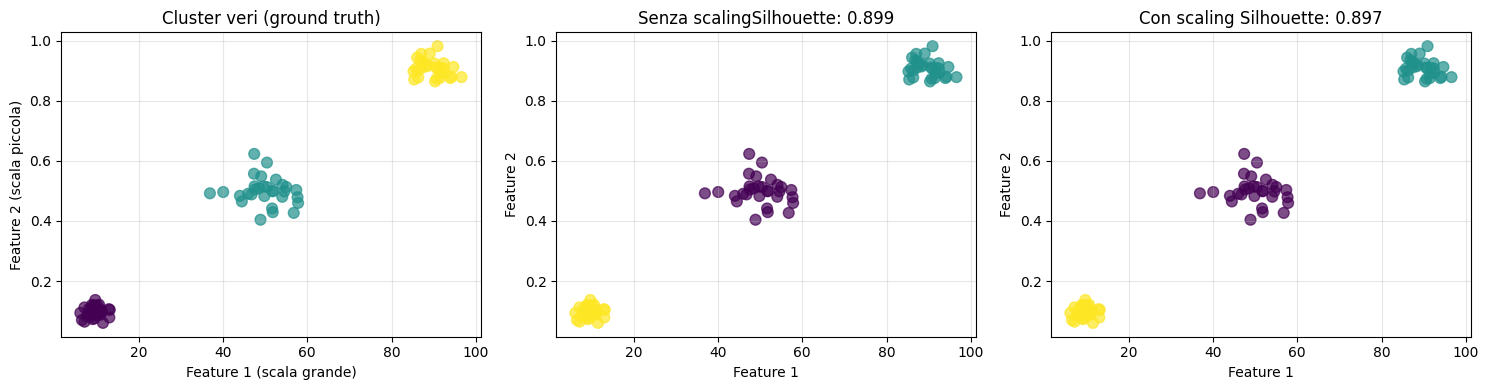

Lezione: con scale diverse K-Means privilegia la feature a range maggiore; con scaling le feature pesano uguale e la qualita migliora.


In [22]:
# ============================================
# ESERCIZIO 20.3 - Confronto K-Means con/ senza scaling
# Intento: mostrare come le scale diverse alterano assegnazioni e silhouette
# ============================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

np.random.seed(42)

c1_f1 = np.random.normal(10, 2, 30)
c1_f2 = np.random.normal(0.1, 0.02, 30)

c2_f1 = np.random.normal(50, 5, 30)
c2_f2 = np.random.normal(0.5, 0.05, 30)

c3_f1 = np.random.normal(90, 3, 30)
c3_f2 = np.random.normal(0.9, 0.03, 30)

feature_1 = np.concatenate([c1_f1, c2_f1, c3_f1])
feature_2 = np.concatenate([c1_f2, c2_f2, c3_f2])
true_labels = np.array([0]*30 + [1]*30 + [2]*30)

X = np.column_stack([feature_1, feature_2])
assert X.shape == (90, 2)
print('[Checkpoint] Range feature1:', feature_1.min(), '-', feature_1.max())
print('[Checkpoint] Range feature2:', feature_2.min(), '-', feature_2.max())

kmeans_no = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_no = kmeans_no.fit_predict(X)
sil_no = silhouette_score(X, labels_no)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans_sc = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_sc = kmeans_sc.fit_predict(X_scaled)
sil_sc = silhouette_score(X_scaled, labels_sc)

changed = np.sum(labels_no != labels_sc)
print('Silhouette senza scaling:', round(sil_no,3))
print('Silhouette con scaling:', round(sil_sc,3))
print('Punti che cambiano cluster:', changed, '/', len(X))

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].scatter(X[:,0], X[:,1], c=true_labels, cmap='viridis', s=60, alpha=0.7)
axes[0].set_title('Cluster veri (ground truth)')
axes[0].set_xlabel('Feature 1 (scala grande)')
axes[0].set_ylabel('Feature 2 (scala piccola)')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(X[:,0], X[:,1], c=labels_no, cmap='viridis', s=60, alpha=0.7)
axes[1].set_title(f'Senza scalingSilhouette: {sil_no:.3f}')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].grid(True, alpha=0.3)

axes[2].scatter(X[:,0], X[:,1], c=labels_sc, cmap='viridis', s=60, alpha=0.7)
axes[2].set_title(f'Con scaling Silhouette: {sil_sc:.3f}')
axes[2].set_xlabel('Feature 1')
axes[2].set_ylabel('Feature 2')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print('Lezione: con scale diverse K-Means privilegia la feature a range maggiore; con scaling le feature pesano uguale e la qualita migliora.')


## Sezione 6 - Conclusione operativa
Punti chiave, metodi usati e errori ricorrenti.


---

## 5. Cosa Portarsi a Casa

### Concetti Fondamentali

| Concetto | Definizione |
|----------|-------------|
| **K-Means** | Algoritmo che partiziona i dati in K cluster minimizzando l'inertia |
| **Centroide** | Punto medio di un cluster, calcolato come media delle coordinate |
| **Inertia (WCSS)** | Somma delle distanze quadrate dai punti ai centroidi |
| **k-means++** | Inizializzazione intelligente che distribuisce i centroidi iniziali |

### Errori Comuni da Evitare

| Errore | Problema | Soluzione |
|--------|----------|-----------|
| Non scalare i dati | Le feature con range grande dominano | Sempre `StandardScaler` prima |
| Scegliere K a caso | Cluster non significativi | Usare Elbow + Silhouette (Lezione 21) |
| Ignorare la forma dei cluster | K-Means fallisce con forme non convesse | Usare DBSCAN per forme arbitrarie (Lezione 23) |
| Una sola inizializzazione | Risultato dipende dal caso | Usare `n_init=10` o superiore |
| Non interpretare i cluster | Clustering inutile senza significato | Sempre analizzare le caratteristiche |

### Ponte verso la Lezione 21

**Problema aperto:** Come scegliere K in modo sistematico?

In questa lezione abbiamo sempre "saputo" K a priori. Ma nella realta:
- Non sappiamo quanti cluster ci siano.
- Diverse scelte di K danno risultati diversi.
- Servono metriche oggettive per decidere.

**Nella prossima lezione:**
- Metodo del Gomito (Elbow Method).
- Silhouette Analysis approfondita.
- Gap Statistic.
- Trade-off interpretabilita vs performance.


### Methods explained
| Metodo/Funzione | Cosa fa | Input (tipo/shape) | Output | Errori comuni | Quando usarlo / evitarlo |
|-----------------|---------|--------------------|--------|---------------|---------------------------|
| `KMeans.fit_predict` | Esegue clustering e restituisce label | X array 2D (n,p) | labels 1D (n,) | Senza scaling domina la feature piu' ampia; K errato | Cluster sferici e K stimato; evita forme arbitrarie |
| `StandardScaler` | Scala feature a media 0, std 1 | X 2D numerico | X_scaled 2D | Shape errata o NaN | Prima di modelli basati su distanza |
| `silhouette_score` | Valuta coesione/separazione cluster | X 2D, labels 1D | float [-1,1] | Valori fuori range segnalano label errate | Confronto configurazioni di clustering |
| `make_blobs` | Genera dati sintetici separabili | n_samples int, centers | X 2D, y 1D | Cluster sovrapposti se std alto | Demo controllate |
| `make_moons/make_circles` | Genera forme non sferiche | n_samples, noise | X 2D, y 1D | Non separabili linearmente | Per mostrare limiti di K-Means |
| `np.linalg.norm` | Calcola norma/distanza | array | float | Uso su shape errata | Per distanze euclidee semplici |
| `np.clip` | Tronca valori in un intervallo | array, min, max | array | Range scelto male distorce | Per limitare valori simulati |


### Common errors and quick debug
| Sintomo | Causa probabile | Fix rapido |
|---------|-----------------|------------|
| Silhouette molto bassa/negativa | K errato o cluster sovrapposti | Provare altri K, valutare forma dei dati |
| Cluster sbilanciati senza motivo | Feature non scalate | Applicare StandardScaler |
| Risultato cambia a ogni run | Seed non fissato o n_init basso | Impostare random_state, aumentare n_init |
| Centroidi spostati verso punti isolati | Outlier non gestiti | Rimuovere outlier o usare metodi robusti |
| K-Means taglia forme a mezzaluna/cerchi | Assunzioni geometriche violate | Usare DBSCAN o spectral clustering |
| Inertia molto alta anche con K alto | Dati non sferici o K insufficiente | Verificare shape, provare alternative |


### Bignami operativo

---

## I 5 Take-Home Messages

### 1. SEMPRE StandardScaler prima di K-Means
```python
# OBBLIGATORIO per K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=K).fit(X_scaled)
```
**Perché:** K-Means usa distanze euclidee. Senza scaling, la feature con range maggiore domina.

### 2. K-Means assume cluster sferici
L'algoritmo minimizza la distanza dai centroidi → definisce implicitamente "sfere" nello spazio.

| Forma cluster | K-Means funziona? |
|---------------|-------------------|
| Sferico/convesso | ✅ Sì |
| Allungato | ⚠️ Dipende |
| Mezzaluna | ❌ No |
| Anello | ❌ No |
| Con outlier | ⚠️ Centroidi distorti |

### 3. I parametri che contano

| Parametro | Default | Consiglio |
|-----------|---------|-----------|
| `n_clusters` | 8 | Scegli con Elbow/Silhouette (Lezione 21) |
| `init` | 'k-means++' | Lascia così (migliore di random) |
| `n_init` | 10 | ≥10 per evitare minimi locali |
| `random_state` | None | SEMPRE fissare per riproducibilità |

### 4. Inertia vs Silhouette: due metriche complementari

| Metrica | Formula | Range | Uso |
|---------|---------|-------|-----|
| **Inertia** | Σ∥x - c∥² | [0, +∞) | Scende sempre con K → Elbow method |
| **Silhouette** | (b-a)/max(a,b) | [-1, +1] | Trova il K ottimale |

### 5. Le etichette sono proposte, non verità
```python
# I cluster NON hanno significato intrinseco
# Cluster 0, 1, 2 sono solo numeri

# Devi TU interpretare e nominare:
cluster_names = {0: 'VIP', 1: 'Occasionali', 2: 'Dormienti'}
df['segment'] = df['cluster'].map(cluster_names)
```

---

## Template completo K-Means

```python
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1. PREPROCESSING (OBBLIGATORIO)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. FITTING
kmeans = KMeans(
    n_clusters=K,
    init='k-means++',
    n_init=10,
    random_state=42
)
labels = kmeans.fit_predict(X_scaled)

# 3. VALUTAZIONE
print(f"Inertia: {kmeans.inertia_:.2f}")
print(f"Silhouette: {silhouette_score(X_scaled, labels):.3f}")

# 4. VISUALIZZAZIONE (se 2D o PCA)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker='X', s=200, c='red', label='Centroidi')
plt.legend()
plt.title(f'K-Means con K={K}')
plt.show()

# 5. INTERPRETAZIONE
df['cluster'] = labels
profile = df.groupby('cluster').mean()
print(profile)
```

---

## Quando usare K-Means vs alternative

| Situazione | Algoritmo consigliato |
|------------|----------------------|
| Cluster sferici, K noto | **K-Means** |
| K sconosciuto | K-Means + Elbow/Silhouette |
| Forme arbitrarie | DBSCAN (Lezione 23) |
| Vuoi gerarchia | Hierarchical (Lezione 22) |
| Molti outlier | DBSCAN o preprocessing |
| Alta dimensionalità | PCA + K-Means (Lezione 25) |

---

## Prossimi passi
→ **Lezione 21**: Come scegliere il numero K ottimale (Elbow method, Silhouette analysis)

### Bignami esteso - Lezione 20

## BIGNAMI Lezione 20: K-Means Clustering

### Definizioni Essenziali

| Termine | Definizione |
|---------|-------------|
| **K-Means** | Algoritmo di clustering che partiziona N punti in K cluster, assegnando ogni punto al cluster con centroide piu vicino |
| **Centroide** | Centro geometrico di un cluster: $\mathbf{c}_k = \frac{1}{|C_k|} \sum_{i \in C_k} \mathbf{x}_i$ |
| **Inertia** | Within-Cluster Sum of Squares: $\text{WCSS} = \sum_{k=1}^{K} \sum_{i \in C_k} \|\mathbf{x}_i - \mathbf{c}_k\|^2$ |
| **Silhouette** | Misura di qualita del clustering: $s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$ |
| **k-means++** | Inizializzazione che sceglie centroidi iniziali distanti tra loro per evitare minimi locali |

---

### Formule Chiave

**Distanza Euclidea:**
$$d(\mathbf{x}, \mathbf{c}) = \sqrt{\sum_{j=1}^{d} (x_j - c_j)^2}$$

**Centroide di un cluster:**
$$\mathbf{c}_k = \frac{1}{|C_k|} \sum_{i \in C_k} \mathbf{x}_i$$

**Inertia (WCSS):**
$$J = \sum_{k=1}^{K} \sum_{i \in C_k} \|\mathbf{x}_i - \mathbf{c}_k\|^2$$

---

### Checklist K-Means

```
 Feature selezionate (solo numeriche rilevanti)
 StandardScaler applicato
 K scelto con criterio (Elbow/Silhouette - Lezione 21)
 n_init >= 10 per evitare minimi locali
 Cluster interpretati e nominati
 Visualizzazione per validare i risultati
 Outlier gestiti se necessario
```

---

### Template di Codice

```python
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 1. Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. K-Means
kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# 3. Valutazione
print(f"Inertia: {kmeans.inertia_:.2f}")
print(f"Silhouette: {silhouette_score(X_scaled, labels):.3f}")

# 4. Interpretazione
df['cluster'] = labels
df.groupby('cluster').mean()  # Profilo dei cluster
```

---

### Quando K-Means Funziona vs Quando Fallisce

| Funziona Bene | Fallisce |
|---------------|----------|
| Cluster sferici/convessi | Forme arbitrarie (mezzalune, anelli) |
| Cluster di dimensioni simili | Cluster molto sbilanciati |
| Dati ben separati | Cluster sovrapposti |
| Pochi outlier | Molti outlier (spostano i centroidi) |

---

### Parametri Chiave di KMeans

| Parametro | Default | Significato |
|-----------|---------|-------------|
| `n_clusters` | 8 | Numero di cluster K |
| `init` | 'k-means++' | Metodo di inizializzazione |
| `n_init` | 10 | Numero di inizializzazioni diverse |
| `max_iter` | 300 | Iterazioni massime per convergenza |
| `random_state` | None | Seed per riproducibilita |

---

### Flusso Mentale

```
DATI  StandardScaler  KMeans(K)  Valutazione  Interpretazione
                                                   
      Normalizza        Itera      Silhouette    Significato
      le scale       converge     Inertia       business
```

---

"K-Means trova K centroidi che minimizzano le distanze intra-cluster.\nFunziona meglio con cluster sferici, dati scalati e K scelto con criterio."


## Sezione 7 - End-of-lesson checklist e glossario


### Checklist finale
- [ ] Dati verificati (shape, assenza di NaN) e scaling applicato
- [ ] Demos eseguite con silhouette e inertia lette criticamente
- [ ] Esercizi 20.1-20.3 completati con interpretazioni testuali
- [ ] Outlier considerati prima di K-Means
- [ ] Numero K motivato (Elbow/Silhouette in follow-up)
- [ ] Cluster descritti e condivisi come ipotesi, non verita'


### Glossario (termini usati)
1. K-Means - algoritmo di clustering a centroidi.
2. Centroide - media delle coordinate di un cluster.
3. Inertia/WCSS - somma degli scarti quadratici dai centroidi.
4. Silhouette score - coesione/separazione dei cluster in [-1,1].
5. k-means++ - inizializzazione che distanzia i centroidi iniziali.
6. StandardScaler - scaling a media 0 e deviazione 1.
7. Cluster sferico - gruppo convesso adatto alla distanza euclidea.
8. Outlier - punto isolato che distorce i centroidi.
9. n_init - numero di inizializzazioni K-Means eseguite.
10. Random seed - valore che rende replicabile la casualita'.
11. Flow decisionale - schema per scegliere algoritmo/approccio.
12. Feature scaling - normalizzazione delle scale prima di misurare distanze.


## Sezione 8 - Didactic changelog

| Versione | Data | Modifiche |
|----------|------|-----------|
| 1.0 | Originale | Versione iniziale del notebook |
| 2.0 | 2026-01-XX | Riorganizzata nelle 8 sezioni obbligatorie |
| 2.1 | 2026-01-XX | Aggiunte rationale e checkpoint a demo e esercizi |
| 2.2 | 2026-01-XX | Inserite Methods explained, Common errors, Glossario |
| 2.3 | 2026-01-XX | Ripulito testo da emoji, reso ASCII-safe |
| 2.4 | 2026-01-XX | **Espansione didattica completa**: mappa lezione con tempi; formula WCSS con spiegazione; algoritmo in 4 passi ASCII; tabella assunzioni con conseguenze; 5 take-home messages; template completo K-Means; confronto parametri; tabella decisionale K-Means vs alternative. |

---

## Note di rilascio v2.4

### Contenuti aggiunti
- **Header**: mappa temporale, formula obiettivo J, visualizzazione algoritmo ASCII, tabella assunzioni/conseguenze
- **Bignami**: 5 principi operativi, template Python completo, confronto metriche, guida scelta algoritmo

### Miglioramenti pedagogici
- Obbligo scaling spiegato in termini di dominanza feature
- Forme cluster con indicazione funziona/non funziona
- Parametri sklearn con valori consigliati
- Distinzione etichette numeriche vs interpretazione semantica

### Competenze verificabili
Dopo questa lezione lo studente può:
1. Implementare K-Means correttamente con preprocessing
2. Interpretare inertia e silhouette
3. Riconoscere quando K-Means è inappropriato
4. Profilare i cluster con groupby

---

**Fine della lezione**